In [31]:
import numpy as np

num_items = 5
capacidade_mochila = 7
valor_items = [2,2,4,5,3]
pesos_items = [3,1,3,4,2]

def mochila(n,c,vl,ps):
    m = np.zeros((n,c))

    for i in range(n):
        for k in range(c):
            if i != 0 and k != 0:
                if ps[i-1] <= k:
                  m[i][k] = max(vl[i-1] + m[i-1][k-ps[i-1]],m[i-1][k])
                else:
                  m[i][k] = m[i-1][k]
    
    return m

m = mochila(num_items+1,capacidade_mochila+1,valor_items,pesos_items)

print(m)
print(np.max(m))


[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  2.  2.  2.  2.  2.]
 [ 0.  2.  2.  2.  4.  4.  4.  4.]
 [ 0.  2.  2.  4.  6.  6.  6.  8.]
 [ 0.  2.  2.  4.  6.  7.  7.  9.]
 [ 0.  2.  3.  5.  6.  7.  9. 10.]]
10.0


[990.0, 980.1, 970.299, 960.59601, 950.9900498999999, 941.480149401, 932.0653479069899, 922.74469442792, 913.5172474836407, 904.3820750088043, 895.3382542587163, 886.3848717161292, 877.5210229989679, 868.7458127689781, 860.0583546412884, 851.4577710948755, 842.9431933839268, 834.5137614500875, 826.1686238355866, 817.9069375972307, 809.7278682212584, 801.6305895390458, 793.6142836436553, 785.6781408072187, 777.8213593991466, 770.0431458051551, 762.3427143471035, 754.7192872036325, 747.1720943315961, 739.7003733882801, 732.3033696543973, 724.9803359578533, 717.7305325982747, 710.553227272292, 703.4476949995691, 696.4132180495734, 689.4490858690776, 682.5545950103868, 675.7290490602829, 668.9717585696801, 662.2820409839833, 655.6592205741434, 649.102628368402, 642.6116020847179, 636.1854860638707, 629.823631203232, 623.5253948911997, 617.2901409422876, 611.1172395328647, 605.006067137536, 598.9560064661606, 592.966446401499, 587.036781937484, 581.1664141181092, 575.3547499769281, 569.6012

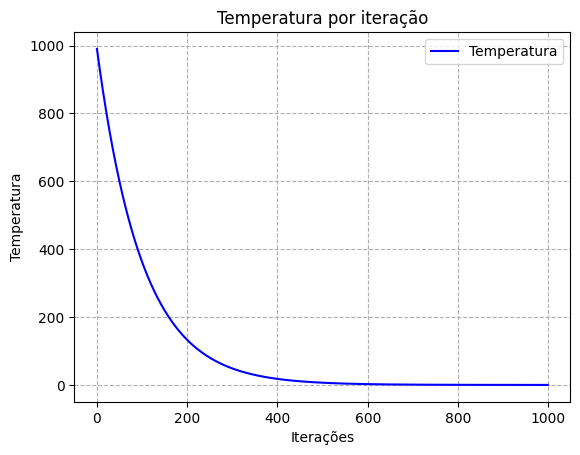

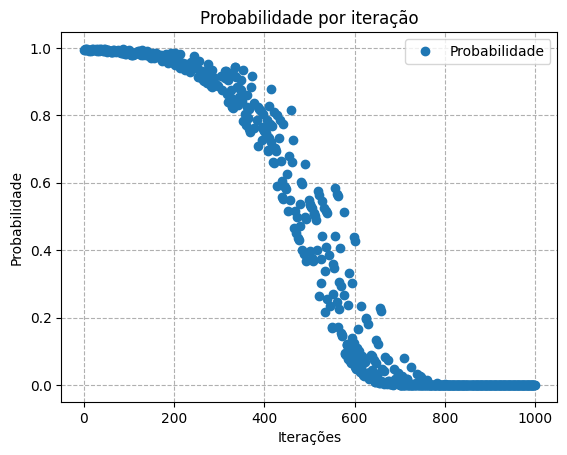

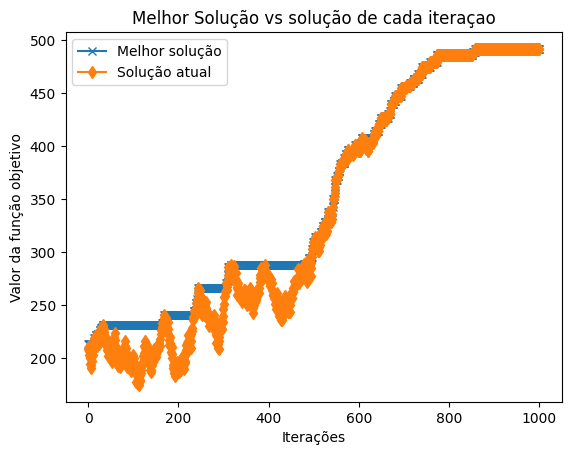

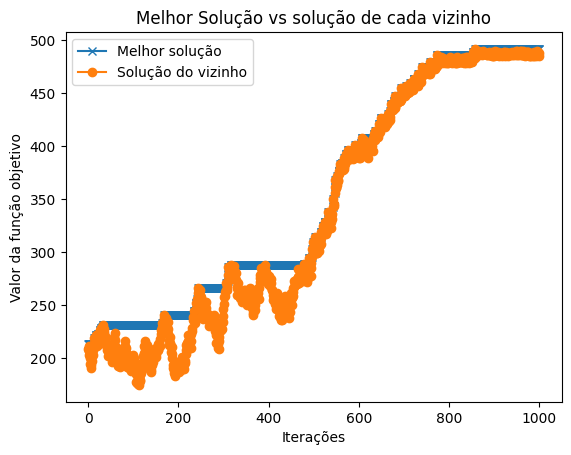

In [32]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import time

# https://www.youtube.com/watch?v=w2rBcPo88XM 
# video do simulated coiso que a stora meteu ate explica bem a cena da temepratua
random.seed(2)

'''num_items = 5
capacidade_mochila = 7
valor_items = [2,2,4,5,3]
pesos_items = [3,1,3,4,2]'''

capacidade_mochila = random.randint(450,550)
valor_items = [random.randint(2,7) for x in range(0,100)]
pesos_items = [random.randint(1,6) for x in range(0,100)]
num_items = len(valor_items)

# ver video
temperatura = 1000
iteracoes = 1000
arrefecer = 0.99
lista_temp = []
lista_prob = []
lista_melhor = []
lista_atual = []
lista_visinho = []

'''
num_items = 3
capacidade_mochila = 50
valor_items = [60, 100, 120]
pesos_items = [10, 20, 30]'''

# isto calcula o valor e os pesos da escolha de objetos que metes aqui
def calc_valor(solucao):
    valor = 0
    peso = 0
    for i in range(num_items):
        if solucao[i] == 1:
            valor += valor_items[i]
            peso += pesos_items[i]
    if peso > capacidade_mochila:
        return -1
    return valor

def sim_an(num, temp, iter,arr):
    global lista_temp

    solucao_temp = [random.choice([0,1]) for nada in range(num)]
    maximo_temp = calc_valor(solucao_temp)

    maximo = maximo_temp
    solucao = solucao_temp[:]

    for zero in range(iter):
        
        # vai alterando a temperatura a cada iteracao
        if temp < 0.01:
            temp = 0
        temp *= arr
        lista_temp.append(temp)

        # faz o vizinho
        visinho = solucao_temp[:]
        i = random.randint(0,num-1)
        visinho[i] = 1 - visinho[i]
        visinho_val = calc_valor(visinho)

        # calcula a probabilidade
        if temp == 0:
            prob = 0
        else:
            prob = min(1,math.exp((visinho_val - maximo_temp) / temp))

        if prob == 1:
            lista_prob.append(None)
        else:
            lista_prob.append(prob)

        # muda o valor atual
        if visinho_val > maximo_temp or random.random() < prob:
            maximo_temp = visinho_val
            solucao_temp = visinho[:]

            if maximo_temp > maximo:
                maximo = maximo_temp
                solucao = solucao_temp[:]
        lista_melhor.append(maximo)
        lista_atual.append(maximo_temp)
        lista_visinho.append(visinho_val)

    return maximo, solucao

inicio = time.time()
maximo, solucao = sim_an(num_items,temperatura,iteracoes,arrefecer)
fim = time.time()
print(lista_temp)
print(lista_prob)
print(solucao)
print(maximo)
print("tempo execucao simulated annealing "+str(fim-inicio))


inicio = time.time()
print(np.max(mochila(num_items+1,capacidade_mochila+1,valor_items,pesos_items)))
fim = time.time()
print("tempo execucao algoritmo normal "+str(fim-inicio))

plt.plot(list(range(0,iteracoes)), lista_temp, color='blue', marker='', label='Temperatura')
plt.title('Temperatura por iteração')
plt.xlabel('Iterações')
plt.ylabel('Temperatura')
plt.grid(True, linestyle='--', alpha=1)
plt.legend()

plt.show()

plt.plot(list(range(0,iteracoes)), lista_prob,'o', label='Probabilidade')
plt.title('Probabilidade por iteração')
plt.xlabel('Iterações')
plt.ylabel('Probabilidade')
plt.grid(True, linestyle='--', alpha=1)
plt.legend()

plt.show()

plt.plot(list(range(0,iteracoes)), lista_melhor, '-x', label='Melhor solução')
plt.plot(list(range(0,iteracoes)), lista_atual, '-d', label='Solução atual')
plt.title('Melhor Solução vs solução de cada iteraçao')
plt.xlabel('Iterações')
plt.ylabel('Valor da função objetivo')
plt.legend()

plt.show()

plt.plot(list(range(0,iteracoes)), lista_melhor, '-x', label='Melhor solução')
plt.plot(list(range(0,iteracoes)), lista_visinho, '-o', label='Solução do vizinho')
plt.title('Melhor Solução vs solução de cada vizinho')
plt.xlabel('Iterações')
plt.ylabel('Valor da função objetivo')
plt.legend()

In [33]:
random.seed(2)
capacidade_mochila = random.randint(450,550)
valor_items = [random.randint(2,7) for x in range(0,100)]
pesos_items = [random.randint(1,6) for x in range(0,100)]
num_items = len(valor_items)
tamanho = 5
iteracoes = 100

lista_atual = []
lista_melhor = []
lista_tabu = []

'''num_items = 5
capacidade_mochila = 7
valor_items = [2,2,4,5,3]
pesos_items = [3,1,3,4,2]
iteracoes = 100
tamanho = 5'''

# calcular o valor da solucao
def calc_valor(solucao):
    valor = 0
    peso = 0
    for i in range(num_items):
        valor += solucao[i] * valor_items[i]
        peso += solucao[i] * pesos_items[i]
    avaliacao = valor * (1 - max(0, peso-capacidade_mochila))
    
    return avaliacao

# fazer os vizinhos
def vizinhos(solucao):
    vizinho_lista = []
    for i in range(num_items):
        vizinho = solucao[:]
        vizinho[i] = 1 - vizinho[i]  # Flip the bit
        vizinho_lista.append(vizinho)
    return vizinho_lista


def tabu(num_items,iteracoes, tabu_tam):
    solucao_atual = [random.choice([0, 1]) for _ in range(num_items)]
    valor_atual = calc_valor(solucao_atual)

    solucao_melhor = solucao_atual[:]
    valor_melhor = valor_atual

    tabu_lista = []

    for _ in range(iteracoes):
        vizinhos_todos = vizinhos(solucao_atual)

        # fazer os vizinhos e ver os que nao estao na lista do tabu
        candidate_solutions = [[]]
        for vizinho in vizinhos_todos:
            vizinho_valor = calc_valor(vizinho)
            if vizinho not in tabu_lista:  # Only consider valid solutions
                candidate_solutions.append([vizinho, vizinho_valor])
        
        candidate_solutions.pop(0)

        # ver o melhor vizinho
        melhor_candidato = candidate_solutions[0]
        for i in candidate_solutions:
            if i[1] > melhor_candidato[1]:
                melhor_candidato = i

        # dar update
        solucao_atual = melhor_candidato[0]
        valor_atual = melhor_candidato[1]

        # update a melhor de todos
        if valor_atual > valor_melhor:
            solucao_melhor = solucao_atual[:]
            valor_melhor = valor_atual

        # update a lista tabu
        tabu_lista.append(solucao_atual)
        if len(tabu_lista) > tabu_tam:
            tabu_lista.pop(0)
        
        lista_melhor.append(valor_melhor)
        lista_atual.append(valor_atual)
        lista_tabu.append(np.mean(np.array([i for i in tabu_lista])))

    return solucao_melhor, valor_melhor


inicio = time.time()
solucao, valor = tabu(num_items,iteracoes,tamanho)
fim = time.time()

print("tempo execuçao "+str(fim - inicio))
print("Best solution:", solucao)
print("Best value:", valor)
print(lista_atual)
print(lista_melhor)
print(lista_tabu)

tempo execuçao 0.1800854206085205
Best solution: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Best value: 492
[221, 228, 235, 242, 249, 256, 263, 270, 277, 283, 289, 295, 301, 307, 313, 319, 325, 331, 337, 343, 349, 355, 361, 367, 372, 377, 382, 387, 392, 397, 402, 407, 412, 417, 422, 426, 430, 434, 438, 442, 446, 450, 454, 458, 462, 465, 468, 471, 474, 477, 480, 483, 486, 488, 490, 492, 490, 488, 490, 488, 490, 492, 490, 488, 490, 488, 490, 492, 490, 488, 490, 488, 490, 492, 490, 488, 490, 488, 490, 492, 490, 488, 490, 488, 490, 492, 490, 488, 490, 488, 490, 492, 490, 488, 490, 488, 490, 492, 490, 488]
[221, 228, 235, 242, 249, 256, 263, 270, 277, 283, 289, 295, 301, 307, 313, 319, 325, 331, 337, 343, 349, 355, 361, 367, 372, 377, 38